# <center> Lab 01: Linear Regression <br> <small>Réda DEHAK<br> 10 mai 2021</small> </center>

The goal of this lab is :
    - Implement a linear regression
    - Try different version of the gradient descent algorithm
    
We will use a data file that contain different measurements of height (variable y) of an individual sample according to the age (variable x).

## Import Data

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
shape(x) :  (50,)
shape(y) :  (50,)


Text(0, 0.5, 'Height')

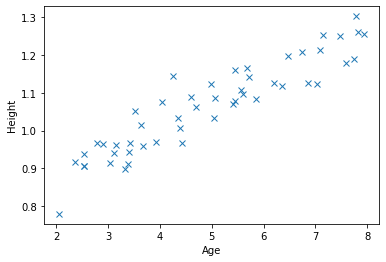

In [1]:
%pylab
%matplotlib inline
import numpy as np
import pickle
import matplotlib.pyplot as plt

fin = open('data.pkl', 'rb')
x = pickle.load(fin)
y = pickle.load(fin)
fin.close()
print("shape(x) : ", x.shape)
print("shape(y) : ", y.shape)
plt.plot(x, y, 'x')
plt.xlabel('Age')
plt.ylabel('Height')

## Linear Regression

We will implement a linear regression for this problem, you know that the linear 
regression assumes that the observed variable $y$ is a linear combination of the 
vector of observation $x$

$$f(x) = x^TA =\sum_{d=1}^D a_{[d]} x_{[d]}$$
with $x_{[D]} = 1$

The linear regression consists in finding the parameters $A$ which minimizes the 
quadratic error:
$$E(A) = \sum_{i=1}^{N}\left(f(x_i) - y_i\right)^2$$

we will solve this problem using two different methods:

**1. Exact solution:**

The vector $A$ which minimize $E(A)$ is defined as follow:
$$A = (XX^T)^{-1}X Y$$

where 
$$X=\left[\begin{matrix}
x_1 & x_2 & ... & x_N\\
1   &  1  & ... &  1
\end{matrix}\right]$$

$$Y=\left[\begin{matrix}
y_1\\
y_2\\
...\\
y_N
\end{matrix}\right]$$

**a-** Compute the vector $A$ wich minimize $E(A)$?

In [2]:
X = np.vstack((x, np.ones(len(x))))
Y = y.reshape(-1, 1)
A = np.linalg.inv(X @ X.T) @ X @ Y
print(A)

[[0.06388117]
 [0.75016254]]


**b-** Plot in the same figure the training data and the straight 
line corresponding to the obtained $A$?

Text(0, 0.5, 'Height')

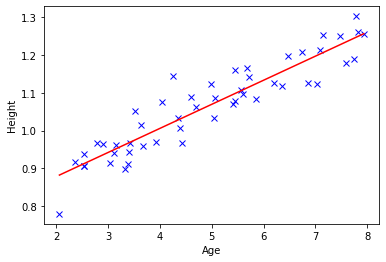

In [3]:
def predict(A, x):
    if isscalar(x):
        X = np.vstack((x, np.ones(1)))
        return X.T @ A
    X = np.vstack((x, np.ones(len(x))))
    return X.T @ A


plt.plot(x, y, 'x', c='blue')
pred = predict(A, x)
plt.plot(x, pred, c='red')
plt.xlabel('Age')
plt.ylabel('Height')


**c-** Predict the height of a person of age 3.5 and that of age 7? 

In [4]:
print("height(3.5) = ", predict(A, 3.5))
print("height(7) = ", predict(A, 7))

height(3.5) =  [[0.97374662]]
height(7) =  [[1.1973307]]


**2. Gradient Descent :**
In this part, we will use the gradient descent algorithm (see convex optimization course) to find the best regression parameters. We will use the batch learning. 

**a-** Give the recurrence formula for $A$ of the algorithm?

$$ A_n = A_{n - 1} - \frac{2\eta}{N}(XX^TA_{n-1}-XY)$$

**b-** Implement a gradient descent with a learning rate $\eta = 0.035$ 
and starting from the origin of the space $A = 0$? Wait until the convergence of the algorithm? (print at each iteration, the number of iteration, the Error and the norm of the gradient)

In [5]:
epsilon = 1e-3
A = np.zeros((2, 1))
X1 = []
Y1 = []
Error = []
# saveA = A
# saveE = np.linalg.norm(y - predict(A,x)) ** 2 / N
N = X.shape[1]
eta = 0.035
iter = 1
while True:
    grad = 2/N * (X @ X.T @ A - X @ Y)
    delta = eta * grad
    A = A - delta
#     saveA = np.hstack((saveA, A))
    E = np.linalg.norm(y - predict(A,x)) ** 2 / N
#     saveB = np.hstack(saveE, E)
    gradnorm = np.linalg.norm(grad)
    print("Iteration : ", iter, "E = ", E, " grad norm : ", gradnorm)
    iter += 1
    X1.append(A[0,0])
    Y1.append(A[1,0])
    Error.append(E)
    if (gradnorm < epsilon):
        break
print(iter, A)

Iteration :  1 E =  60.61274201573478  grad norm :  11.064593204634097
Iteration :  2 E =  50.13969182077156  grad norm :  10.669994449028952
Iteration :  3 E =  53.39848462322629  grad norm :  10.28947178222644
Iteration :  4 E =  43.88809418464124  grad norm :  9.92252315860663
Iteration :  5 E =  47.13123909859575  grad norm :  9.568664440433823
Iteration :  6 E =  38.48482162652406  grad norm :  9.22742875912108
Iteration :  7 E =  41.6843691102327  grad norm :  8.898365899277785
Iteration :  8 E =  33.81438303714266  grad norm :  8.581041704727669
Iteration :  9 E =  36.94827605618678  grad norm :  8.275037505713627
Iteration :  10 E =  29.776971895034865  grad norm :  7.9799495665336035
Iteration :  11 E =  32.82810090879354  grad norm :  7.695388552878845
Iteration :  12 E =  26.286340303922465  grad norm :  7.420979018171738
Iteration :  13 E =  29.2417364272667  grad norm :  7.156358908225555
Iteration :  14 E =  23.267960869196074  grad norm :  6.901179083572621
Iteration :  

Iteration :  468 E =  1.374014750486371  grad norm :  0.004957547897816037
Iteration :  469 E =  1.3733967981754391  grad norm :  0.004921381531698522
Iteration :  470 E =  1.372783081914879  grad norm :  0.004885479006983951
Iteration :  471 E =  1.3721747014941392  grad norm :  0.004849838398887474
Iteration :  472 E =  1.3715705189563192  grad norm :  0.004814457796667953
Iteration :  473 E =  1.3709715549642494  grad norm :  0.004779335303523057
Iteration :  474 E =  1.3703767492397185  grad norm :  0.004744469036487067
Iteration :  475 E =  1.3697870488982888  grad norm :  0.004709857126332346
Iteration :  476 E =  1.3692014659329064  grad norm :  0.0046754977174682764
Iteration :  477 E =  1.3686208790996557  grad norm :  0.004641388967840262
Iteration :  478 E =  1.368044367633325  grad norm :  0.004607529048833443
Iteration :  479 E =  1.3674727467541583  grad norm :  0.004573916145172111
Iteration :  480 E =  1.3669051582612206  grad norm :  0.004540548454823687
Iteration :  4

**c-** Did you obtain the same result as question 1?Oui, avec une erreur de 0.01

**d-** To understand the gradient descent, we will display in 3D the curve of the error:

In [6]:
import numpy as np
error = np.zeros((100,100))
a0 = np.linspace(-.2, .45, 100)
a1 = np.linspace(-.1, 1, 100)
for i in range(a0.shape[0]):
    for j in range(a1.shape[0]):
        A = np.array([[a0[i]],[a1[j]]])
        error[i, j] = np.linalg.norm(y - predict(A,x)) ** 2 / N

In [7]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import interactive
A0, A1 = np.meshgrid(a0, a1)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(A0, A1, error.T, cmap=cm.jet, rstride=1, cstride=1)
ax.set_xlabel('A0')
ax.set_ylabel('A1')
interactive(True)

<ipython-input-7-07f45e7c6ffb>:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


You can see different views of the plot using the mouse in the interactive mode

**e-** What is the link between this figure and different values of $A$ founded during the iterations of the gradient descent algorithm? Plot the path obtained using the different values of $A$ in the same figure?

In [8]:
%matplotlib qt
A0, A1 = np.meshgrid(a0, a1)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(A0, A1, error.T , cmap=cm.jet, rstride=1, cstride=1)
ax.plot3D(X1, Y1 , Error ,color ='red')
ax.set_xlabel('A0')
ax.set_ylabel('A1')
interactive(True)

<ipython-input-8-89c48a79fd5d>:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


**f-** Conclude?

Les pas sont trop grande, ça prend beaucoup trop d'iterration pour converger.

**g-** How can we improve the speed of convergence? implement this new method and compare the result with the previous decent algorithm? Plot the path obtained using the different values of A in the same figure for the two algorithms?

In [15]:
epsilon = 1e-3
A = np.zeros((2, 1))
N = X.shape[1]
NewtonA = A
NewtonE = np.linalg.norm(y - predict(A,x)) ** 2 / N
iter = 1
while True:
    grad = 2/N * (X @ X.T @ A - X @ Y)
    grad2nd = 2/N * (X @ X.T)
    delta = np.linalg.inv(grad2nd) @ grad
    A = A - delta
    NewtonA = np.hstack((NewtonA, A))
    E = np.linalg.norm(y - predict(A,x)) ** 2 / N
    NewtonE = np.hstack((NewtonE, E))
    gradnorm = np.linalg.norm(grad)
    print("Iteration : ", iter, "E = ", E, " grad norm : ", gradnorm)
    iter += 1
    if (gradnorm < epsilon):
        break
print(iter, A)

Iteration :  1 E =  1.292151664045167  grad norm :  11.064593204634097
Iteration :  2 E =  1.2921516640451725  grad norm :  2.4283519182169844e-15
3 [[0.06388117]
 [0.75016254]]


In [17]:
%matplotlib qt

A0, A1 = np.meshgrid(a0, a1)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(A0, A1, error.T , cmap=cm.jet, rstride=1, cstride=1)
ax.plot3D(X1, Y1, Error , color ='red')
ax.plot3D(NewtonA[0, :], NewtonA[1, :], NewtonE , color ='green')
ax.set_xlabel('A0')
ax.set_ylabel('A1')
interactive(True)

<ipython-input-17-93d7478d1a1f>:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


**h-** To run a linear Regression you can also use the sklearn library.

In [55]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept = False).fit(X.T, Y)
print("A = ", reg.coef_)
print("height(3.5) = ", reg.predict(np.array([[3.5, 1]])))
print("height(7) = ", reg.predict(np.array([[7, 1]])))
print("Score = ", reg.score(X.T, y.reshape((50,1))))

A =  [[0.06388117 0.75016254]]
height(3.5) =  [[0.97374662]]
height(7) =  [[1.1973307]]
Score =  0.8580632237208231
